<a href="https://colab.research.google.com/github/GarettGazay/ai_projects/blob/master/RouteBuilder_TFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
!pip install transformers 
!pip install sentencepiece
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [301]:
# %load_ext google.colab.data_table
# %debug


In [302]:
import pandas as pd

In [303]:
df = pd.read_csv('ordering_dataset.csv')
df = df.fillna(0)

In [304]:
import pandas as pd
import random
import numpy as np

def create_shuffled_target_lists(df):
    # Group rows by pickup date
    df['pickup_timestamp'] = pd.to_datetime(df['pickup_timestamp'])
    groups = df.groupby(df['pickup_timestamp'].dt.date)

    shuffled_rides = []
    target_order = []

    for name, group in groups:
        rides = group.iloc[1:, 1:].to_numpy()
        # np.random.shuffle(rides)
        shuffled_rides.append(rides.tolist())
        target_order.append(group.iloc[1:, 1:].to_numpy().tolist()) # EXCLUDES HEADERS, AND FIRST FEATURE WHICH IS PICKUP TIMESTAMP - DONT WANT THAT.

    return shuffled_rides, target_order

x= create_shuffled_target_lists(df)
shuffled_rides = x[0]
target_order = x[1]

In [305]:
len(target_order[0])

77

In [306]:
df.head()

,pickup_timestamp,hour,minute,space_type,asset,trip_cost,status,rider_id,pickup_long,pickup_lat,dropoff_long,dropoff_lat,billable_distance
0,2021-10-30 04:30:00,4,30,WCH,SC105,69.875,<DR>,390520,-121.952339,37.385990,-121.902954,37.378399,7.106001
1,2021-10-30 05:00:00,5,0,WCH,SC105,0.000,<PF>,388691,-121.924309,37.399342,-121.931480,37.311272,10.029552
2,2021-10-30 05:00:00,5,0,WCH,SC301,100.850,<PF>,411690,-121.994217,37.342159,-121.979036,37.322465,2.596089
3,2021-10-30 05:15:00,5,15,BWC,SC107,154.400,<PF>,388852,-121.594933,37.023769,-121.812098,37.306048,26.139221
4,2021-10-30 05:27:10,5,27,STR,SC204,201.075,<PF>,390529,-121.894813,37.321892,-121.931571,37.311278,2.742732


In [307]:
def create_dataset(shuffled_rides, target_order):
  dataset=[]
  count = 0

  for sr,to in zip(shuffled_rides, target_order):
    str_inputs = []
    str_targets = []

    for i in sr:
      i_pickup_hour = str(i[0])
      i_pickup_minute =str(i[1])
      i_space_type =str(i[2])
      i_trip_cost =str(i[4])
      i_status = str(i[5])
      i_rider_id =str(i[6])
      i_pickup_longitude =str(i[7])
      i_pickup_latitude =str(i[8])
      i_dropoff_longitude =str(i[9])
      i_dropoff_latitude =str(i[10])
      i_billable_distance = str(i[11])

      str_inputs.append(
        i_pickup_hour + "|" 
        + i_pickup_minute + "|"
        + i_space_type + "|"
        + i_trip_cost + "|"
        + i_status + "|"
        + i_rider_id + "|"
        + i_pickup_longitude + "|"
        + i_pickup_latitude + "|"
        + i_dropoff_longitude + "|"
        + i_dropoff_latitude + "|"
        + i_billable_distance
        + "<SEP>")
    
    for j in to:
      j_pickup_hour = str(j[0])
      j_pickup_minute = str(j[1])
      j_space_type = str(j[2])
      j_asset_id = str(j[3])
      j_trip_cost = str(j[4])
      j_rider_id = str(j[6])
      j_pickup_longitude = str(j[7])
      j_pickup_latitude = str(j[8])
      j_dropoff_longitude = str(j[9])
      j_dropoff_latitude = str(j[10])
      j_billable_distance = str(j[11])
                   
      str_targets.append(
        j_pickup_hour + "|" 
      + j_pickup_minute + "|"
      + j_space_type + "|"
      + j_asset_id + "|"
      + j_trip_cost + "|"
      + j_rider_id + "|"
      + j_pickup_longitude + "|"
      + j_pickup_latitude + "|"
      + j_dropoff_longitude + "|"
      + j_dropoff_latitude + "|"
      + j_billable_distance
      + "<SEP>")
  
    dataset.append({
        'id' : count,
        'input' : str_inputs,
        'target' : str_targets
    })
    count += 1

  return dataset

rides_dataset = create_dataset(shuffled_rides, target_order)

In [308]:
for i in rides_dataset[6]['input'][:3]:
  print(i + "\n")

4|30|WCH|69.65|<PF>|388477|-122.0266571|37.32122421|-122.0791626|37.3829422|6.955629<SEP>

5|0|WCH|0.0|<PF>|388691|-121.9243088|37.39934158|-121.9314804|37.31127167|10.029552<SEP>

5|0|WCH|100.85|<PF>|411690|-121.9942169|37.34215927|-121.9790344|37.32246399|2.596089<SEP>



In [309]:
for i in rides_dataset[6]['target'][:3]:
  print(i + "\n")

4|30|WCH|SC101|69.65|388477|-122.0266571|37.32122421|-122.0791626|37.3829422|6.955629<SEP>

5|0|WCH|SC105|0.0|388691|-121.9243088|37.39934158|-121.9314804|37.31127167|10.029552<SEP>

5|0|WCH|SC103|100.85|411690|-121.9942169|37.34215927|-121.9790344|37.32246399|2.596089<SEP>



In [310]:
# Chunk input and target sequences
largest_sequence = 2730 #  len of the largest token sequence in the dataset
num_chunks = 3 # how many chunks we want to break the sequence up into
ride_overlap_size = 4 # number of overlapping rides on either side of a chunk to chunk overlap
ride_token_len = 22 # number of tokens in each ride including the '|' seperator and <SEP>, this is used to multiply by the ride_overlap_size to determine how many rides will overlap into the next chunk
chunk_size = (largest_sequence / num_chunks) # extend the chunk size by the additional needed token spaces so the largest sequences in the dataset can be exposed in their entirety to the model - this is needed due to the overlapping of ride tokens and the threshold 

print(chunk_size)

910.0


In [311]:
count = 0
count_id = 1 # incrementes the id of each dict so they are in a sequential order from start to end and each dict has a unique id
new_rides_dataset=[] # fill with generated chunks for each day of rides sequences
chunk_tokens=[]
for i in range(len(rides_dataset)):
  input = rides_dataset[i]['input']
  target = rides_dataset[i]['target']


  target_len = len(target)
  if target_len > 50: # skip any days that don't offer sufficient training data so it doesn't waste resources and slow down training.
    
    chunk_size = len(target) // num_chunks # break the day up into chunks based on the target length
    input_chunk1 = input[:chunk_size]
    input_chunk2 = input[chunk_size:2*chunk_size]
    input_chunk3 = input[2*chunk_size:]

    target_chunk1 = target[:chunk_size]
    target_chunk2 = target[chunk_size:2*chunk_size]
    target_chunk3 = target[2*chunk_size:]

    # Add chunk token Id's
    chunk1_token = f'<START_{count}>' # also used for the df
    chunk2_token = f'<MID_{count}>'
    chunk3_token = f'<END_{count}>'

    chunk_tokens.append([chunk1_token, chunk2_token, chunk3_token]) # add for the vocab file

    target_chunk1.append(chunk1_token)
    target_chunk2.append(chunk2_token)
    target_chunk3.append(chunk3_token)

    # Shuffle the input chunk 
    np.random.shuffle(input_chunk1)
    np.random.shuffle(input_chunk2)
    np.random.shuffle(input_chunk3)

    # Append chunk token for inputs after they've been shuffled
    input_chunk1.append(chunk1_token)
    input_chunk2.append(chunk2_token)
    input_chunk3.append(chunk3_token)


    # Add chunks with tags to the new rides_dataset as seperate sequences 
    # which will be understood as a single sequence by their chunk tags
    new_rides_dataset.append({
        'id' : count_id,
        'input' : input_chunk1, # Start
        'target' : target_chunk1 # Start
        })
    count_id += 1
    
    new_rides_dataset.append({
        'id' : count_id,
        'input' : input_chunk2,  # Mid
        'target' : target_chunk2 # Mid
        })
    count_id += 1
    new_rides_dataset.append({
        'id' : count_id,
        'input' : input_chunk3, # End
        'target' : target_chunk3 # End
        })
    count_id += 1

    count +=1
    # if count == 5:
    #   print(new_rides_dataset[0]['input'])
    #   print(new_rides_dataset[0]['target'])
    #   break
rides_dataset = new_rides_dataset
print('Total Input and Target sequences [[start],[mid],[end]]:',count)

Total Input and Target sequences [[start],[mid],[end]]: 412


In [312]:
rides_dataset[5]

{'id': 6,
 'input': ['13|15|WCH|100.175|<PF>|390537|-121.8320389|37.29574585|-121.8120956|37.30604935|2.259927<SEP>',
  '13|45|WCH|34.4|<PF>|390539|-121.8134232|37.35033035|-121.888064|37.332132|6.417522<SEP>',
  '17|45|WCH|38.675|<PF>|388702|-121.93367|37.31555176|-121.8411942|37.36575317|8.318918<SEP>',
  '14|30|WCH|29.45|<PF>|388488|-122.0791626|37.3829422|-122.0695877|37.41511917|4.176236<SEP>',
  '16|45|WCH|22.475|<PF>|388479|-122.0140457|37.37662125|-122.0238342|37.3819046|1.051981<SEP>',
  '13|15|WCH|77.975|<PF>|388492|-121.934817|37.32753|-121.8113861|37.30517197|10.738537<SEP>',
  '18|0|WCH|55.375|<PF>|388492|-121.811386|37.305172|-121.934817|37.32753|10.738537<SEP>',
  '15|0|WCH|45.2|<PF>|415878|-121.8914642|37.24549484|-121.9509048|37.33436203|11.216371<SEP>',
  '15|0|WCH|27.875|<PF>|390540|-121.9314804|37.31127167|-121.8941803|37.29782867|3.531874<SEP>',
  '17|30|WCH|25.175|<PF>|390537|-121.8120956|37.30604935|-121.8320389|37.29574585|2.259927<SEP>',
  '13|29|WCH|26.75|<PF>

In [313]:
# Add chunk tokens to a df which can be used to add them to the vocabulary
chunk_tokens_df = pd.DataFrame(chunk_tokens)
chunk_tokens_df.tail()

,0,1,2
407,<START_407>,<MID_407>,<END_407>
408,<START_408>,<MID_408>,<END_408>
409,<START_409>,<MID_409>,<END_409>
410,<START_410>,<MID_410>,<END_410>
411,<START_411>,<MID_411>,<END_411>


Create dataset

In [314]:
from datasets import DatasetDict, load_dataset

# Convert list of dictionaries to new format
data_format = [{'id': d['id'], 'translation': {'input': d['input'], 'target': d['target']}} for d in rides_dataset]
# test_data = [{'translation': {'input': d['input'], 'target': d['target']}} for d in test_data]

# Convert new format list of dictionaries to pandas DataFrame
full_dataset = pd.DataFrame.from_records(data_format, columns=['id', 'translation'])
# test_data = pd.DataFrame.from_records(test_data, columns=['id', 'translation'])

# Write DataFrame to CSV file
full_dataset.to_csv("full_dataset.csv", index=False)

# Load the training and test datasets
full_dataset = load_dataset('csv', data_files="full_dataset.csv")
train_dataset = full_dataset['train'].train_test_split(test_size=0.2)
dataset_dict = DatasetDict({'train': train_dataset['train'], 'test': train_dataset['test']})


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-39a1135b0c14a0d6/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [315]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 988
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 248
    })
})

input lens:  [77, 70, 73, 65, 5, 124, 89, 107, 59, 89, 73, 115, 91, 115, 85, 119, 70, 116, 84, 120, 99, 118, 68, 109, 94, 113, 107, 105, 64, 117, 88, 110, 91, 89, 42, 107, 75, 99, 86, 101, 23, 36, 108, 82, 111, 81, 103, 54, 114, 83, 108, 79, 103, 60, 95, 76, 91, 91, 91, 56, 103, 85, 105, 89, 98, 62, 105, 93, 93, 79, 102, 69, 103, 92, 101, 93, 111, 67, 113, 88, 117, 93, 107, 74, 103, 85, 103, 95, 106, 58, 124, 102, 115, 94, 117, 73, 122, 95, 114, 94, 105, 70, 114, 98, 100, 107, 103, 70, 120, 92, 113, 92, 110, 74, 114, 91, 101, 86, 106, 72, 107, 98, 109, 92, 110, 65, 113, 94, 103, 98, 101, 67, 117, 97, 104, 93, 112, 65, 111, 100, 108, 99, 104, 69, 117, 91, 103, 102, 108, 66, 118, 108, 117, 86, 97, 73, 120, 98, 109, 100, 108, 66, 122, 101, 114, 87, 108, 65, 103, 86, 111, 92, 104, 70, 123, 107, 103, 91, 110, 67, 107, 84, 114, 93, 116, 69, 105, 85, 105, 90, 97, 74, 94, 88, 115, 95, 88, 68, 82, 83, 102, 91, 100, 69, 106, 94, 101, 102, 86, 69, 97, 89, 121, 82, 106, 67, 123, 85, 108, 92, 115, 

(array([ 3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  2.,  6.,  2.,  5.,
        13.,  9., 10., 10., 11.,  7., 17., 10., 21., 17., 29., 24., 15.,
        30., 20., 36., 15., 30., 12., 19., 13., 12.,  8.,  8.]),
 array([  1.  ,   3.46,   5.92,   8.38,  10.84,  13.3 ,  15.76,  18.22,
         20.68,  23.14,  25.6 ,  28.06,  30.52,  32.98,  35.44,  37.9 ,
         40.36,  42.82,  45.28,  47.74,  50.2 ,  52.66,  55.12,  57.58,
         60.04,  62.5 ,  64.96,  67.42,  69.88,  72.34,  74.8 ,  77.26,
         79.72,  82.18,  84.64,  87.1 ,  89.56,  92.02,  94.48,  96.94,
         99.4 , 101.86, 104.32, 106.78, 109.24, 111.7 , 114.16, 116.62,
        119.08, 121.54, 124.  ]),
 <BarContainer object of 50 artists>)

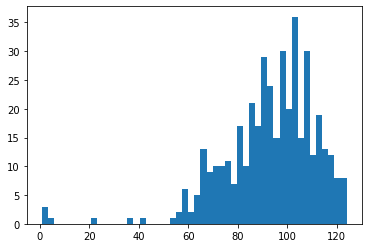

In [316]:
import matplotlib.pyplot as plt
input_lens = [len(x) for x in target_order]
print('input lens: ', input_lens)
plt.hist(input_lens, bins=50)

If you want the model to predict the vehicle ID during the ordering prediction, you can remove the vehicle ID from the input sequence that you provide to the model and train the model to predict it as part of the output sequence.

For example, during training, you can provide the model with a sequence of rides without the vehicle ID, and train it to output the correct order of rides along with the corresponding vehicle ID for each ride.

During inference, you can provide the model with a sequence of rides without the vehicle ID, and let it predict the correct order of rides along with the corresponding vehicle ID for each ride.

In [317]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer, BartForConditionalGeneration
input_max_length=910
target_max_length=910

checkpoint='facebook/bart-large'

model = BartForConditionalGeneration.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint, model_max_length=input_max_length, sep_token='|')

In [318]:
# Get all the text columns and concatenate them with numerical columns
text_columns = df.select_dtypes(include=['object', 'float', 'int']).astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)

# Concatenate all the text columns into one long string
text = ' '.join(text_columns)

# Split the string into a list of unique words
unique_words = list(set(text.split()))

# Write the unique words to a text file, one word per line
with open('custom_vocab.txt', 'w') as f:
    f.write('\n'.join(unique_words))



In [319]:
# Append chunk tokens to the custom vocab file
text_columns = chunk_tokens_df.select_dtypes(include=['object']).astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)
text = ' '.join(text_columns)
unique_words = list(set(text.split()))

with open('custom_vocab.txt', 'a') as f:
    f.write('\n'.join(unique_words))


In [320]:

# Open the text file
with open('custom_vocab.txt', 'r') as f:
    # Read the contents of the file into a list
    custom_vocab = [line.split('\n')[0] for line in f.readlines()]

# Print the list
print(custom_vocab)

['37.38976288', '227.625', '214.6', '411690', '-122.058888', '69.55', '433453', '2.957727', '58.1525', '37.23026657', '13.500532', '127.08', '476751', '1.051981', '7.594399', '36.55', '3.347327', '12.352238', '31.16', '466035', '449493', '254.48', '-122.0222222', '27.4925', '388585', '485910', '388484', '37.362537', '179.52', '15.81079', '49.725', '-121.9619141', '196.35', '2.551971', '4.478844', '37.30810165', '-121.9035263', '67.6', '181.2', '37.33658981', '124.025', '37.35953522', '37.31890488', '37.30512238', '11.591058', '124.5675', '-121.8646851', '0.851279', '-121.850283', '497817', '13.4325', '110.345', '37.29402161', '6.223032', '388890', '9.078233', '427780', '99.44', '89.35', '7.478202', '-121.8183148', '15.9', '65.45', '493895', '101.12', '428882', '37.018049', '7.667099', '37.691879', '388496', '61.3925', '37.322655', '209.08', '37.465064', '5.267364', '-122.0141068', '2.207732', '15.218002', '-121.9573822', '34.183884', '-121.9255905', '37.343688', '124.995', '10.578845',

In [321]:
tokenizer.add_tokens(custom_vocab)
tokenizer.add_tokens("<SEP>")

1

In [322]:
# def tokenizer_fn(batch):
#     inputs = [eval(x)['input'] for x in batch['translation']]
#     targets = [eval(x)['target'] for x in batch['translation']]

#     # Join the list of strings into a single string or the tokenizer will not understand the data
#     inputs = [' '.join(inp) for inp in inputs]
#     targets = [' '.join(tgt) for tgt in targets]

#     # Tokenize the inputs and targets
#     tokenized_inputs = tokenizer(inputs, max_length=input_max_length, truncation=True)
#     tokenized_targets = tokenizer(text_target=targets, max_length=target_max_length ,truncation=True)
    
#     # Add the labels to the tokenized_inputs
#     tokenized_inputs['labels'] = tokenized_targets['input_ids']
    
#     return tokenized_inputs


In [323]:
def tokenizer_fn(batch):
    # Get the inputs and targets from the batch
    examples = batch['translation']
    example_ids = batch['id']

    # Create a list of dictionaries that contain both the input, target, and example id
    example_dicts = [{'input': eval(x)['input'], 'target': eval(x)['target'], 'id': ex_id} for x, ex_id in zip(examples, example_ids)]
    
    # Sort the examples based on the 'id' key in each dictionary
    examples = sorted(example_dicts, key=lambda x: x['id'])
    
    # Extract the inputs and targets from the sorted examples
    inputs = [' '.join(ex['input']) for ex in examples]
    targets = [' '.join(ex['target']) for ex in examples]

    # Tokenize the inputs and targets
    tokenized_inputs = tokenizer(inputs, max_length=input_max_length, truncation=True)
    tokenized_targets = tokenizer(text_target=targets, max_length=target_max_length ,truncation=True)
    
    # Add the labels to the tokenized_inputs
    tokenized_inputs['labels'] = tokenized_targets['input_ids']
    
    return tokenized_inputs


In [324]:
# Apply the tokenizer function to the dataset using the 'map()' method
tokenized_datasets = dataset_dict.map(
    tokenizer_fn,
    batched=True,
    remove_columns=dataset_dict['train'].column_names
)

Map:   0%|          | 0/988 [00:00<?, ? examples/s]

Map:   0%|          | 0/248 [00:00<?, ? examples/s]

In [325]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 988
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 248
    })
})

In [328]:
# input id tokens [505, 9175, 2128, 9175, 35524, 1820, 36604, 1820, 36722, 1820, 39638, 1820, 32518, 1820, ...]
tokenizer.decode(tokenized_datasets['train'][0]['input_ids'])

'<s>5|30|WCH|103.325|<PF>|390534|-121.9642258|37.29271698|-121.9337045|37.3155593|3.689702<SEP> 8|15|BWC|50.0|<DR>|388851|-121.8116608|37.26219559|-121.826913|37.251936|2.517796<SEP> 8|30|STR|126.075|<PF>|390529|-121.9315708|37.3112781|-121.8948135|37.32189178|2.742732<SEP> 8|40|WCH|84.4|<PF>|390539|-121.888064|37.332132|-121.8134232|37.35033035|6.417522<SEP> 8|16|WCH|22.025|<PF>|388994|-121.9678116|37.3220253|-121.9790344|37.32246399|0.914658<SEP> 8|30|BWC|93.6|<PF>|388505|-121.8325653|37.33570862|-121.8270276|37.2519668|10.860326<SEP> 5|43|WCH|63.8|<PF>|388496|-121.8491211|37.32672882|-121.8120956|37.30604935|4.43659<SEP> 5|15|BWC|154.4|<PF>|388852|-121.5949326|37.02376938|-121.8120978|37.3060479|26.139221<SEP> 8|30|STR|0.0|<PF>|421836|-121.9516678|37.38991928|-122.0140457|37.37662125|5.489193<SEP> 8|30|WCH|82.375|<PF>|388709|-121.9232407|37.30308914|-121.950932|37.255799|5.512184<SEP> 9|10|WCH|27.875|<PF>|388482|-122.1578217|37.45035553|-122.1483078|37.47801208|3.512611<SEP> 5|30|WC

In [329]:
# label tokens [305, 9175, 1808, 9175, 35524, 1820, 39055, 1820, 39119, 1820, 35073, 1820, 5033, 9175, 5647, ...]
# tokenized_datasets['train'][0]['labels']
tokenizer.decode(tokenized_datasets['train'][0]['labels'])

'<s>5|0|WCH|SC105|0.0|388691|-121.9243088|37.39934158|-121.9314804|37.31127167|10.029552<SEP> 5|0|WCH|SC301|100.85|411690|-121.9942169|37.34215927|-121.9790364|37.322465|2.596089<SEP> 5|15|BWC|SC107|154.4|388852|-121.5949326|37.02376938|-121.8120978|37.3060479|26.139221<SEP> 5|27|STR|SC204|201.075|390529|-121.8948135|37.32189178|-121.9315708|37.3112781|2.742732<SEP> 5|30|WCH|SC105|58.85|390198|-121.9492645|37.30254364|-121.9337082|37.31555939|2.207732<SEP> 5|30|WCH|SC105|103.325|390534|-121.9642258|37.29271698|-121.9337045|37.3155593|3.689702<SEP> 5|37|STR|SC103|0.0|421840|-121.8948135|37.32189178|-121.9315708|37.3112781|2.742732<SEP> 5|43|WCH|SC301|63.8|388496|-121.8491211|37.32672882|-121.8120956|37.30604935|4.43659<SEP> 5|53|BWC|SC105|77.2|388574|-121.9619141|37.27531433|-121.8917009|37.2454899|6.762383<SEP> 6|0|WCH|SC301|101.3|388896|-121.8397293|37.31420898|-121.8113861|37.30517197|2.777529<SEP> 7|15|BWC|SC105|104.0|417084|-121.9148788|37.30213547|-121.7762604|37.22948456|13.49742

In [330]:
# In general, it's not uncommon for input_ids and labels to have different lengths
len(tokenized_datasets['train'][0]['input_ids']), len(tokenized_datasets['train'][0]['labels'])

(554, 554)

In [331]:
input_ids_len = []
for i in range(len(tokenized_datasets['train'])):
  input_ids_len.append(len(tokenized_datasets['train'][i]['input_ids']))

labels_len = []
for i in range(len(tokenized_datasets['train'])):
  labels_len.append(len(tokenized_datasets['train'][i]['labels']))

print(f'Max Num Input Ids: {max(input_ids_len)} \n Max Num labels: {max(labels_len)}')
print(f'Min Num Input Ids: {min(input_ids_len)} \n Min Num labels: {min(labels_len)}')

Max Num Input Ids: 910 
 Max Num labels: 910
Min Num Input Ids: 400 
 Min Num labels: 400


In [332]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model,)
batch = data_collator([tokenized_datasets['train'][i] for i in range(1,3)])
batch.keys()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

The batch dictionary is training examples, and the labels key in the batch dictionary contains the labels for the corresponding input sequences. In the context of sequence-to-sequence modeling, the labels typically represent the "target" or "output" sequence that the model is being trained to generate given the corresponding input sequence.

In [333]:
batch['labels']

tensor([[    0,   245, 15483,  ...,  1437, 58378,     2],
        [    0,   466, 15483,  ...,  1437, 58438,     2]])

Think of seq2seq RNNs, the decoder RNN must have some input. This allows the decoder to predict the next word, given the previous words from the encoder. THE DECODER IDS ARE A SHIFTED FORWARD ONE - VERSION OF THE TARGETS SO THE DECODER CAN TRAIN TO PREDICT THE NEXT TOKEN IN A SEQUENCE.

In [334]:
batch['decoder_input_ids']

tensor([[    2,     0,   245,  ..., 58731,  1437, 58378],
        [    2,     0,   466,  ..., 58731,  1437, 58438]])

In [335]:
# the decoder input ids are shifted forward by adding the </s> at the front of the list
tokenizer.convert_ids_to_tokens(batch['decoder_input_ids'][0]) 

['</s>',
 '<s>',
 '5',
 '|',
 '0',
 '|',
 'WCH',
 '|',
 'SC105',
 '|',
 '0.0',
 '|',
 '388691',
 '|',
 '-121.9243088',
 '|',
 '37.39934158',
 '|',
 '-121.9314804',
 '|',
 '37.31127167',
 '|',
 '10.029552',
 '<SEP>',
 'Ġ5',
 '|',
 '0',
 '|',
 'WCH',
 '|',
 'SC301',
 '|',
 '100.85',
 '|',
 '411690',
 '|',
 '-121.9942169',
 '|',
 '37.34215927',
 '|',
 '-121.9790344',
 '|',
 '37.32246399',
 '|',
 '2.596089',
 '<SEP>',
 'Ġ5',
 '|',
 '15',
 '|',
 'BWC',
 '|',
 'SC302',
 '|',
 '154.4',
 '|',
 '388852',
 '|',
 '-121.5949326',
 '|',
 '37.02376938',
 '|',
 '-121.8120956',
 '|',
 '37.30604935',
 '|',
 '26.139221',
 '<SEP>',
 'Ġ5',
 '|',
 '27',
 '|',
 'STR',
 '|',
 'SC204',
 '|',
 '201.075',
 '|',
 '390529',
 '|',
 '-121.8948135',
 '|',
 '37.32189178',
 '|',
 '-121.931572',
 '|',
 '37.3112793',
 '|',
 '2.742732',
 '<SEP>',
 'Ġ5',
 '|',
 '30',
 '|',
 'WCH',
 '|',
 'SC105',
 '|',
 '58.85',
 '|',
 '390198',
 '|',
 '-121.9492645',
 '|',
 '37.30254364',
 '|',
 '-121.9337082',
 '|',
 '37.31555939',
 '|'

In [336]:
# labels are in line with the target data, the decoder input ids are shifted forward
# now the model can compare the target to the predicted next token
tokenizer.convert_ids_to_tokens(batch['labels'][0])

['<s>',
 '5',
 '|',
 '0',
 '|',
 'WCH',
 '|',
 'SC105',
 '|',
 '0.0',
 '|',
 '388691',
 '|',
 '-121.9243088',
 '|',
 '37.39934158',
 '|',
 '-121.9314804',
 '|',
 '37.31127167',
 '|',
 '10.029552',
 '<SEP>',
 'Ġ5',
 '|',
 '0',
 '|',
 'WCH',
 '|',
 'SC301',
 '|',
 '100.85',
 '|',
 '411690',
 '|',
 '-121.9942169',
 '|',
 '37.34215927',
 '|',
 '-121.9790344',
 '|',
 '37.32246399',
 '|',
 '2.596089',
 '<SEP>',
 'Ġ5',
 '|',
 '15',
 '|',
 'BWC',
 '|',
 'SC302',
 '|',
 '154.4',
 '|',
 '388852',
 '|',
 '-121.5949326',
 '|',
 '37.02376938',
 '|',
 '-121.8120956',
 '|',
 '37.30604935',
 '|',
 '26.139221',
 '<SEP>',
 'Ġ5',
 '|',
 '27',
 '|',
 'STR',
 '|',
 'SC204',
 '|',
 '201.075',
 '|',
 '390529',
 '|',
 '-121.8948135',
 '|',
 '37.32189178',
 '|',
 '-121.931572',
 '|',
 '37.3112793',
 '|',
 '2.742732',
 '<SEP>',
 'Ġ5',
 '|',
 '30',
 '|',
 'WCH',
 '|',
 'SC105',
 '|',
 '58.85',
 '|',
 '390198',
 '|',
 '-121.9492645',
 '|',
 '37.30254364',
 '|',
 '-121.9337082',
 '|',
 '37.31555939',
 '|',
 '2.207